0. Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Carregando os dados

In [2]:
#Carregando o conjunto de dados "Titanic" da biblioteca seaborn
titanic_data = sns.load_dataset('titanic')

#Exibindo informações e as cinco primeiras linhas do dataset
titanic_data.info()
titanic_data.head()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Pré-processamento de dados

PARTE 1

In [3]:
#Excluindo colunas desnecessárias
titanic_data.drop(columns=['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace=True)

#Exibindo informações e as cinco primeiras linhas do dataset com as remoções
titanic_data.info()
titanic_data.head()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    str     
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    str     
 8   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), str(2)
memory usage: 57.0 KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
#Determinando a quantidade de valores ausentes por coluna
(titanic_data.isnull().sum() / len(titanic_data)) * 100

survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
fare         0.000000
embarked     0.224467
deck        77.216611
dtype: float64

In [5]:
#Apresentando a média e mediana da coluna "age"
mean = titanic_data["age"].mean()
median = titanic_data["age"].median()
dif = (abs(mean-median)/median)*100
print(f"Diferença entre a média e mediana representa {dif} da mediana")

Diferença entre a média e mediana representa 6.0682773109243575 da mediana


In [6]:
#Trocando os valores nulos da coluna "age" pela mediana
titanic_data["age"] = titanic_data["age"].fillna(median)

#Trocando os valores nulos da coluna "embarked" pela moda
titanic_data["embarked"] = titanic_data["embarked"].fillna(titanic_data["embarked"].mode()[0])

#Removendo a coluna "deck"
titanic_data = titanic_data.drop('deck', axis=1)

In [7]:
#Conferindo a nova quantidade de valores ausentes por coluna
print((titanic_data.isnull().sum() / len(titanic_data)) * 100)

#Apresentando novo formato do dataset
titanic_data.head()

survived    0.0
pclass      0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
embarked    0.0
dtype: float64


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


PARTE 2

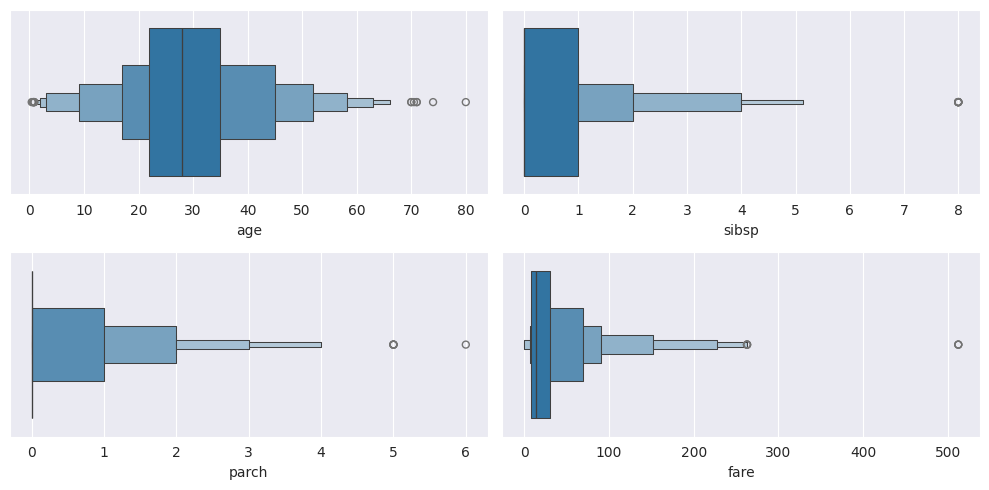

In [8]:
#Mudando o estilo da figura para o tema "dark"
sns.set_style("darkgrid")
#Definindo o tamanho da figura (largura, altura)
plt.figure(figsize=(10, 5))

cols = ['age', 'sibsp', 'parch', 'fare']
for i in range(4):
    #Criando uma grade de 2 linhas e 2 colunas
    plt.subplot(2, 2, i+1)
    #Plotando boxplot para analisar as colunas numéricas contínuas
    sns.boxenplot(x=titanic_data[cols[i]])

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()

In [9]:
#Exibindo os maiores valores da coluna "fare" e suas respectivas "pclass" 
print((titanic_data.loc[titanic_data['fare']==titanic_data['fare'].max()])[['pclass', 'fare']].to_string(index=False))

 pclass     fare
      1 512.3292
      1 512.3292
      1 512.3292


PARTE 3

In [10]:
#Verificando as estatísticas básicas das colunas numéricas contínuas
cols = ['age', 'sibsp', 'parch', 'fare']
resume_num = titanic_data[cols].describe().T
resume_num['cv'] = (resume_num['std']/resume_num['mean'])*100
print(resume_num.T)

              age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582    0.523008    0.381594   32.204208
std     13.019697    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     35.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200
cv      44.342625  210.846437  211.234407  154.307253


In [11]:
#Verificando as estatísticas básicas das colunas categóricas e numéricas discretas
cols = ['survived', 'pclass', 'sex', 'embarked']

print(f'Frequência de cada valor:\n')
for i in range(4):
    print(f'{titanic_data[cols[i]].value_counts(normalize=True)*100}\n') #normalize faz a frequência ser relativa (%)

Frequência de cada valor:

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64



3. Mineração de dados

PARTE 1 (UNIVARIADA)

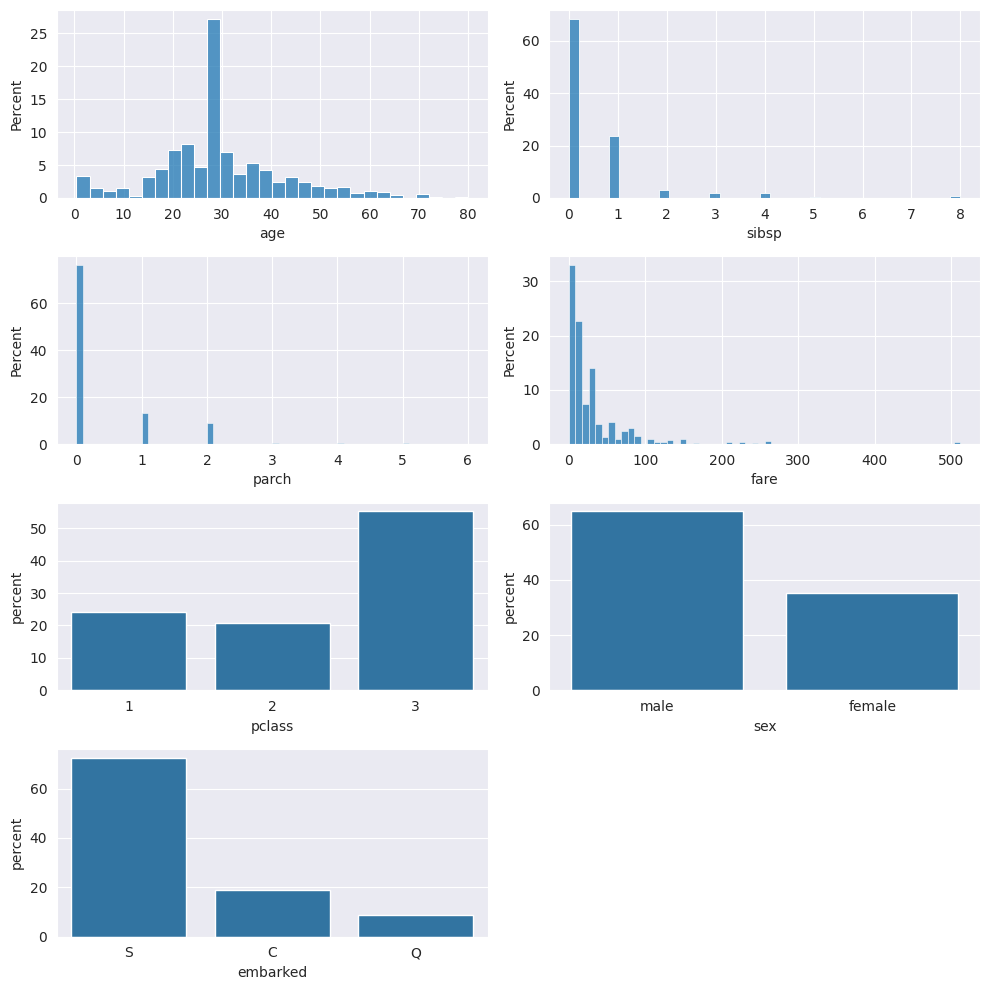

In [12]:
#Mudando o estilo da figura para o tema "dark"
sns.set_style("darkgrid")
#Definindo altura e largura da figura
plt.figure(figsize=(10,10))

cols = ['age', 'sibsp', 'parch', 'fare', 'pclass', 'sex', 'embarked']
for i, col in enumerate(cols):
    #Criando uma grade de 4 linhas e 2 colunas
    plt.subplot(4, 2, i+1)
    if i<=3:
        #Histograma
        sns.histplot(titanic_data[cols[i]], stat='percent')
    else:
        #Gráfico de barras com contagem absoluta
        sns.countplot(data=titanic_data, x=cols[i], stat='percent')

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()

PARTE 2 (BIVARIADA)

/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/wor

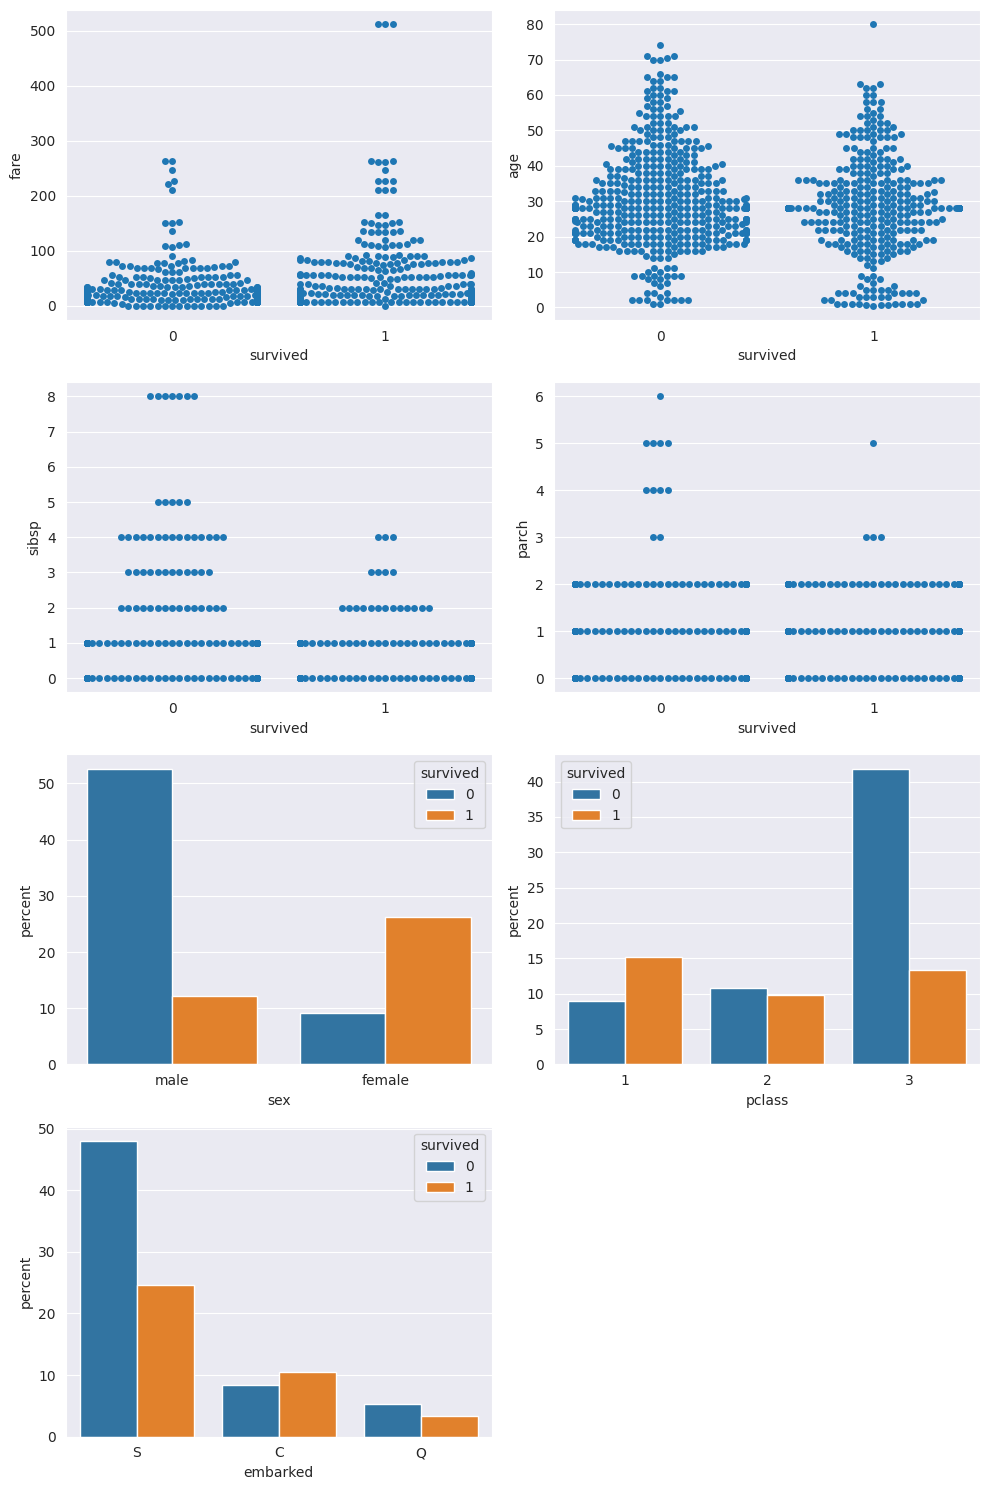

In [ ]:
#Mudando o estilo da figura para o tema "dark"
sns.set_style("darkgrid")
#Definindo altura e largura da figura
plt.figure(figsize=(10,15))

cols = ['fare', 'age', 'sibsp', 'parch', 'sex', 'pclass', 'embarked']
for i in range(7):
    #Criando uma grade de 4 linhas e 2 colunas
    plt.subplot(4, 2, i+1)
    if i<=3:
        #Gráfico de dispersão
        sns.swarmplot(x=titanic_data['survived'], y=titanic_data[cols[i]])
    else:
        #Gráfico de barras
        sns.countplot(x=cols[i], hue='survived', data=titanic_data, stat='percent')

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()


PARTE 3 (MULTIVARIADA)

/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/workspaces/Titanic_Data_Analysis/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/wor

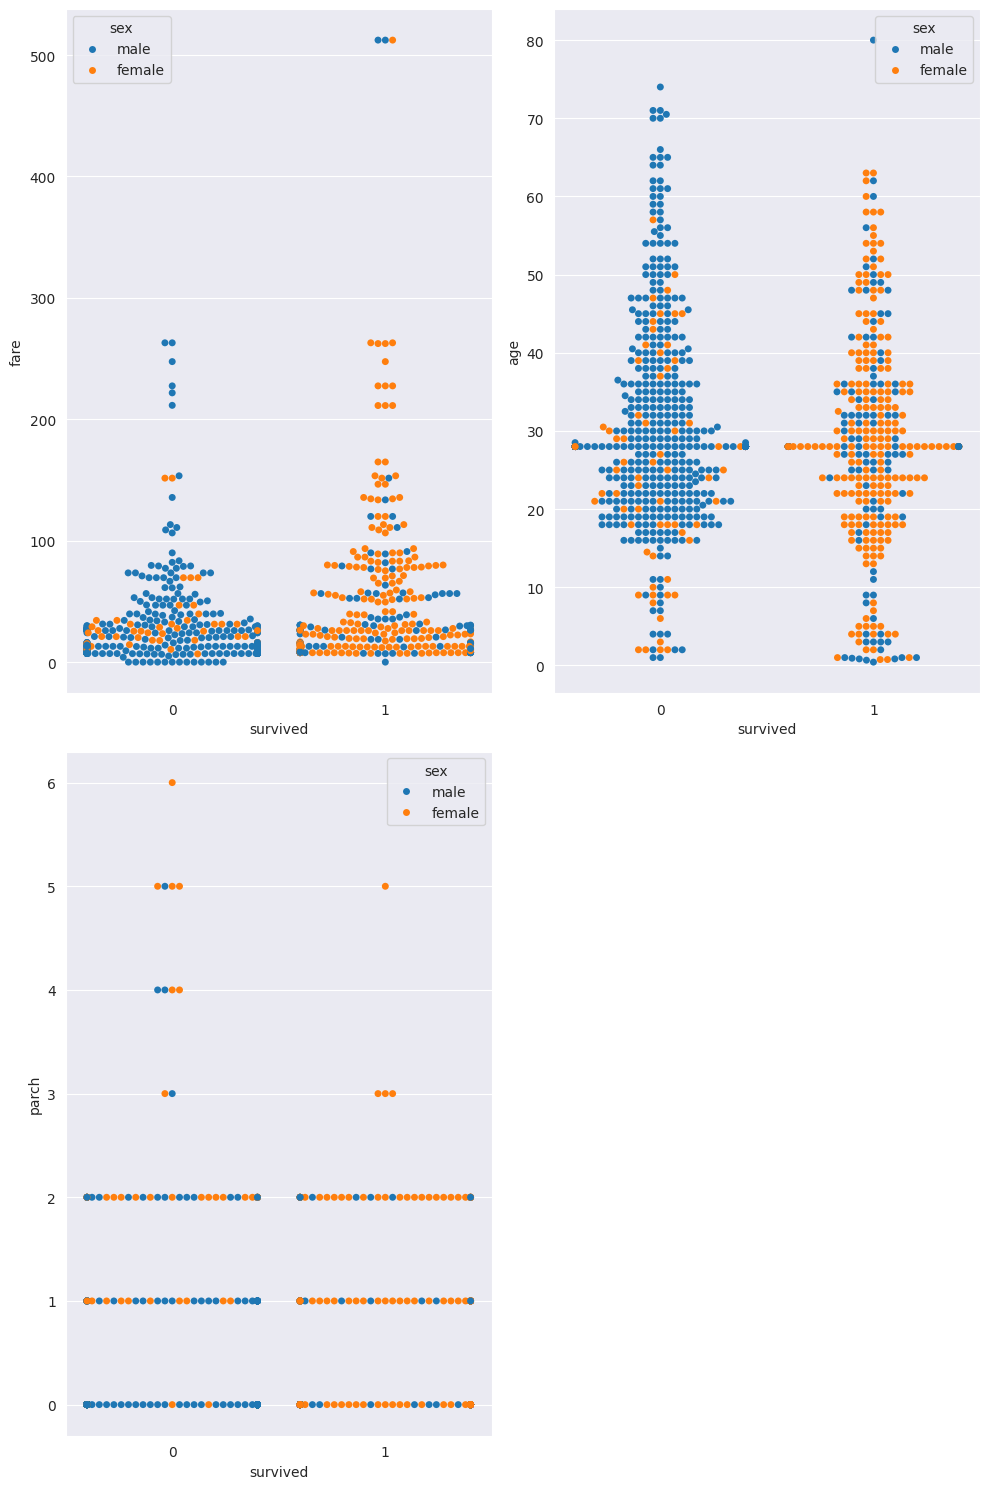

In [51]:
#Mudando o estilo da figura para o tema "dark"
sns.set_style("darkgrid")
#Definindo altura e largura da figura
plt.figure(figsize=(10,15))


cols = ['fare', 'age', 'parch']
for i in range(3):
    #Criando uma grade de 2 linhas e 2 colunas
    plt.subplot(2, 2, i+1)
    #Gráficos de dispersão
    sns.swarmplot(x=titanic_data['survived'], y=titanic_data[cols[i]], hue=titanic_data['sex'])

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()